In [1]:
# imamo grid... sestkotnik je 4 enote sirok in 2 enoti visok

A1 = vector([0, - 2])
A2 = vector([3, - 1])

############## Razredi #############

class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, c, d):
        return U(self.a + c, self.b + d)
    
class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
               self.b == other.b and
               self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + vector([2, 0])
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
        
    def premakni(self, c, d):
        return V(self.a + c, self.b + d)

############## Funkcije #############

def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()

    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)

    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica

# lahko bi poskusili dodati le tiste, ki so "blizje" paralelogramu, ne celege pravokotnika
# def grid1(k, l, m, n):
#     mina = min(0, k, m, k + m)
#     maxa = max(0, k, m, k + m)
#     minb = min(0, l, n, l + n)
#     maxb = max(0, l, n, l + n)

#     mnozica = set()
#     for i in range(mina, maxa + 1):
#         for j in range(minb, maxb + 1):
#             mnozica.add(U(i, j))
    
#     return mnozica

# 3x3 matrika
def determinanta(matrika): 
    a11 = matrika[0][0]
    a12 = matrika[0][1]
    a13 = matrika[0][2]
    
    a21 = matrika[1][0]
    a22 = matrika[1][1]
    a23 = matrika[1][2]
    
    a31 = matrika[2][0]
    a32 = matrika[2][1]
    a33 = matrika[2][2]
        
    det = (
          a11 * (a22 * a33 - a32 * a23) - 
          a12 * (a21 * a33 - a31 * a23) + 
          a13 * (a21 * a32 - a31 * a22)
          )
            
    return det

# gledamo kje je tocka w glede na vektor uv
# ce je tocka levo, je predznak determinante pozitiven,
# ce desno, je predznak negativen,
# ce pa so kolinearne je determinanta 0.
# sprejme tocke U ali V
def zavoj(u, v , w):
    u_x, u_y = u.koordinate()
    v_x, v_y = v.koordinate()
    w_x, w_y = w.koordinate()
    
    matrika = matrix([[1, 1, 1], [u_x, v_x, w_x], [u_y, v_y, w_y]])
    
    return sgn(determinanta(matrika))

def v_paralelogramu(G, u0, u1, u2, u3):
    # G mnozica Ujev, ki jih bomo pregledali,
    # ui zaporedna oglisca v paralelogramu, tako da je notranjost na levi,
    # u0 pa je izhodisce 
    # dopuscamo tocke na daljici u0u1 in na daljici  u3u0
    
    Uji = set()
    Vji = set()
    
    for u in G:   
        v = V(u.a, u.b) # "pripadajoce" vozlisce V

        pogoj_u = (zavoj(u0, u1, u) >= 0 and
                   zavoj(u1, u2, u) >  0 and
                   zavoj(u2, u3, u) >  0 and
                   zavoj(u3, u0, u) >= 0)
        
        pogoj_v = (zavoj(u0, u1, v) >= 0 and
                   zavoj(u1, u2, v) >  0 and
                   zavoj(u2, u3, v) >  0 and
                   zavoj(u3, u0, v) >= 0)
        if pogoj_u:
            Uji.add(u)
        if pogoj_v:
            Vji.add(v)
    
    return Uji, Vji
    
def vozlisca_na_torusu(k, l, m, n):
    G = grid(k, l, m, n)
    
    u_00 = U(0,0)
    u_kl = U(k, l)
    u_klmn = U(k + m, l + n)
    u_mn = U(m, n)

    # ugotovimo orientacijo
    if zavoj(u_kl, u_mn, u_00) == 0:
        Uji, Vji = "Izrojen", "Izrojen" # niso mnozice
    elif zavoj(u_kl, u_mn, u_00) > 0:
        # u_00 lezi levo od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_kl, u_klmn, u_mn)
    elif zavoj(u_kl, u_mn, u_00) < 0:
        # u_00 lezi desno od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_mn, u_klmn, u_kl)
    
    return Uji, Vji

def povezave_na_torusu(k, l, m, n):
    Uij, Vij = vozlisca_na_torusu(k, l, m, n)
    if Uij == "Izrojen":
        return Uij # paralelogram je izrojen
    else:
        vozlisca = union(Uij, Vij) # vozlisca znotraj paralelograma (brez stranic)
        pregledane = set()
        povezave = []
        for tocka in vozlisca:
            for sosed in (tocka.sosedi() - pregledane): # tocka.sosedi().difference(pregledane)
                sosed_kl = sosed.premakni(k, l)
                sosed_mn = sosed.premakni(m, n)
                if sosed in vozlisca:
                    povezave.append((tocka, sosed))
                else:
                    if sosed_kl in vozlisca:
                        povezave.append((tocka, sosed_kl))
                    elif sosed_mn in vozlisca:
                        povezave.append((tocka, sosed_mn))
                    elif sosed == U(k + m, l + n):
                        povezave.append((tocka, U(0, 0))) # to je sosed_klmn, nasprotno oglisce
            pregledane.add(tocka)
        return povezave 

def nanotorus(k, l, m, n):
    p = povezave_na_torusu(k, l, m, n)
    if p == "Izrojen":
        #print("Paralelogram je izrojen!")
        pass
    else:
        G = Graph(p, multiedges = True)
        G._pos = {v: v.koordinate() for v in G}
        return G

#def pvs(G):
#    s = []
#    s.append(G.vertices()[0])
#    d = {}
#    oce = {}
#    for v in G.vertices():
#        d[v] = "Inf"
#        oce[v] = "None"
#    d[G.vertices()[0]] = 0
#    while len(s) > 0:
#        w = s[0]
#        del(s[0])
#        for j in w.sosedi(): #ne dela, ker ti sosedje niso isto kot sosedi na grafu
#            if d[j] == "Inf":
#                d[j] = d[w] + 1
#                oce[j] = w
#                s.append(j)
#    return d, oce

In [8]:
def vozlisca_na_razdalji_d(graf, start, dodane, d=0):
    # dodane je na zacetku prazna mnozica
    # start je vozlisce, kjer zacnemo
    if d == 0:
        dodane.add(start)
    elif d < 0:
        print("Negativna dolzina!")
    else:
        dodane.add(start)
        for povezava in graf[start]:
            vozlisca_na_razdalji_d(graf, povezava, dodane, d - 1)
    return dodane

# zanima nas za razdalje d, 1 <= d <= diam(graf)
# poskusi dobiti formulo za stevilo teh vozlisc v odvisnosti od k, l, m, n, d

In [27]:
k, l, m, n = 10, 0, 0, 2

H = nanotorus(k, l, m, n)
radij = H.diameter()
print("Radij je {}, (k, l, m, n) = ({},{},{},{})".format(radij, k, l, m, n))
for d in range(radij + 1):
    #print("korak :", d)
    bliznje = vozlisca_na_razdalji_d(H, U(0,0), set(), radij - d)
    #print(bliznje)
    print("razdalja : {}, stevilo sosedov : {} ".format(radij - d, len(bliznje)))

Radij je 10, (k, l, m, n) = (10,0,0,2)
razdalja : 10, stevilo sosedov : 40 
razdalja : 9, stevilo sosedov : 38 
razdalja : 8, stevilo sosedov : 34 
razdalja : 7, stevilo sosedov : 30 
razdalja : 6, stevilo sosedov : 26 
razdalja : 5, stevilo sosedov : 22 
razdalja : 4, stevilo sosedov : 18 
razdalja : 3, stevilo sosedov : 14 
razdalja : 2, stevilo sosedov : 9 
razdalja : 1, stevilo sosedov : 4 
razdalja : 0, stevilo sosedov : 1 


(True, 40, 60, True, 6)


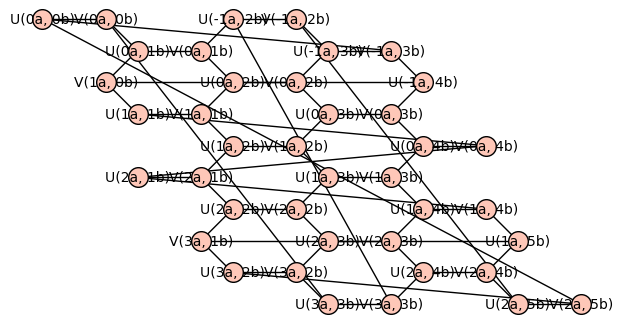

In [45]:
G = nanotorus(4,2,-2,4)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 480, 720, True, 36)


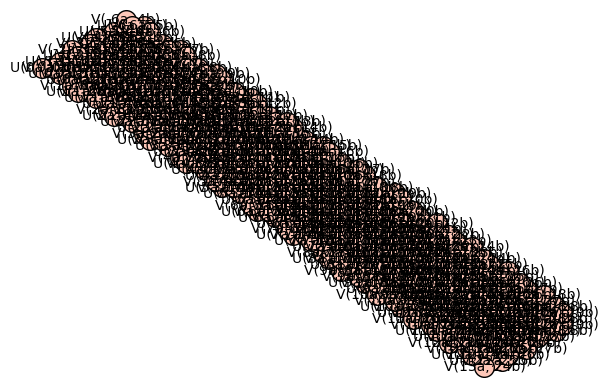

In [46]:
G = nanotorus(-7,5,13,25)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 1310, 1965, True, 35)


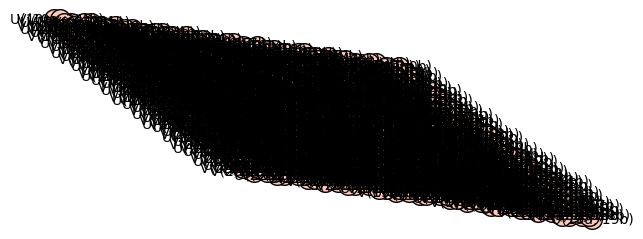

In [47]:
G = nanotorus(10,-35,13,20)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

(True, 40, 60, True, 10)


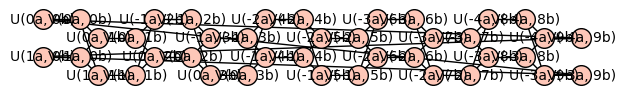

In [48]:
G = nanotorus(2,0,-5,10)
print(G.is_vertex_transitive(), G.order(), G.size(), G.degree().count(3) == len(G.degree()), G.diameter())
#(tranzitivnost, št. vozlišč, št. povezav, vse točke reda 3, premer)
G.plot() 

In [49]:
G = nanotorus(2,0,-5,10)

def izomorfna(F, G):
    try:
        return F.is_isomorphic(G)
    except AttributeError:
        return False

for k in range(-10, 10):
    for l in range(-10, 10):
        for m in range(-10, 10):
            for n in range(-10, 10):
                if izomorfna(nanotorus(k,l,m,n),G):
                    print('{},{},{},{}'.format(k,l,m,n))


-10,-10,0,2
-10,-10,2,0
-10,-9,0,-2
-10,-9,0,2
-10,-8,0,-2
-10,-8,0,2
-10,-7,0,-2
-10,-7,0,2
-10,-6,0,-2
-10,-6,0,2
-10,-5,0,-2
-10,-5,0,2
-10,-4,0,-2
-10,-4,0,2
-10,-3,0,-2
-10,-3,0,2
-10,-2,0,-2
-10,-2,0,2
-10,-1,-10,1
-10,-1,0,-2
-10,-1,0,2
-10,0,-2,2
-10,0,0,-2
-10,0,0,2
-10,0,2,-2
-10,1,-10,-1
-10,1,0,-2
-10,1,0,2
-10,2,0,-2
-10,2,0,2
-10,3,0,-2
-10,3,0,2
-10,4,-10,6
-10,4,0,-2
-10,4,0,2
-10,5,0,-2
-10,5,0,2
-10,6,-10,4
-10,6,0,-2
-10,6,0,2
-10,7,0,-2
-10,7,0,2
-10,8,0,-2
-10,8,0,2
-10,9,0,-2
-10,9,0,2
-9,-10,-2,0
-9,-10,2,0
-9,-1,-2,2
-9,-1,2,-2
-8,-10,-2,0
-8,-10,2,0
-8,-2,-2,2
-8,-2,2,-2
-7,-10,-2,0
-7,-10,2,0
-7,-3,-2,2
-7,-3,2,-2
-6,-10,-2,0
-6,-10,2,0
-6,-4,-4,-6
-6,-4,-2,2
-6,-4,2,-2
-6,-4,4,6
-5,-10,-2,0
-5,-10,2,0
-5,-5,-2,2
-5,-5,2,-2
-4,-10,-2,0
-4,-10,2,0
-4,-6,-6,-4
-4,-6,-2,2
-4,-6,2,-2
-4,-6,6,4
-3,-10,-2,0
-3,-10,2,0
-3,-7,-2,2
-3,-7,2,-2
-2,-10,-2,0
-2,-10,2,0
-2,-8,-2,2
-2,-8,2,-2
-2,0,-9,-10
-2,0,-8,-10
-2,0,-7,-10
-2,0,-6,-10
-2,0,-5,-10
-2,0,-4,-10
-2,0,-3,-10

In [26]:
nanotorus(-10,10,0,2).is_isomorphic(G)

True

In [31]:
# (k, l, m, n) izomorfen (k', 0, m', n')?
H = nanotorus(1, 2, 3, 4)
for k in range(1, 8):
    for m in range(1, 8):
        for n in range(1, 8):
            G = nanotorus(k, 0, m, n)
            if(H.is_isomorphic(G)):
                print (k,0,m,n)

(1, 0, 5, 2)
(1, 0, 7, 2)
(2, 0, 4, 1)
(3, 0, 7, 1)


In [33]:
nanotorus(10,-10,0,2).is_isomorphic(G)

False

In [38]:
J = nanotorus(1,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
3 tock na razdalji 1
5 tock na razdalji 2
7 tock na razdalji 3
9 tock na razdalji 4
11 tock na razdalji 5
13 tock na razdalji 6
15 tock na razdalji 7
17 tock na razdalji 8
19 tock na razdalji 9


In [39]:
J = nanotorus(2,0,0,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3
18 tock na razdalji 4
22 tock na razdalji 5
26 tock na razdalji 6
30 tock na razdalji 7
34 tock na razdalji 8
38 tock na razdalji 9


In [40]:
J = nanotorus(2,0,-5,10)
r = J.diameter()
for i in range(r):
    print("{} tock na razdalji {}".format(len(vozlisca_na_razdalji_d(J, U(0,0), set(), i)), i))

1 tock na razdalji 0
4 tock na razdalji 1
9 tock na razdalji 2
14 tock na razdalji 3
18 tock na razdalji 4
22 tock na razdalji 5
26 tock na razdalji 6
30 tock na razdalji 7
34 tock na razdalji 8
38 tock na razdalji 9


In [50]:
nanotorus(2,0,-5,10).is_isomorphic(nanotorus(2,0,7,10))

True